This notebook was made to observe the behavior of the Augmented Dataset Function

In [ ]:
from moabb.pipelines.features import AugmentedDataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### False signal

In [44]:
n_trials = 1
n_channels = 5
n_samples = 100

one_channel = np.arange(n_samples)
one_trial = np.array([one_channel for i in range(n_channels)])

false_signal = np.array([one_trial for i in range(n_trials)])
dummy = np.ones(n_trials)

Original false signal visualization

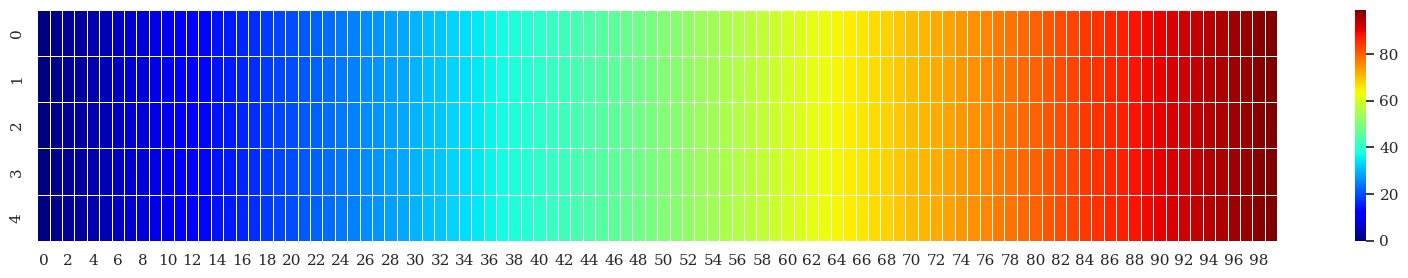

In [69]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.heatmap(false_signal[0], ax=ax,linewidth=.5, cmap='jet')
plt.show()

### Augmented matrix

In [45]:
order, lag = 10, 2 

augmented_dataset = AugmentedDataset(order=order, lag=lag)
augmented_signal = augmented_dataset.fit_transform(false_signal, dummy)

Observation 1: the size of the trial changes. It eliminates *order x lag* samples.\
Hence, theoretically, *order x lag < number of signal sample points*. In this case, 10 x 2 < 100

In [70]:
augmented_signal.shape

(1, 50, 80)

Observation 2: it moves the signal back *order* times

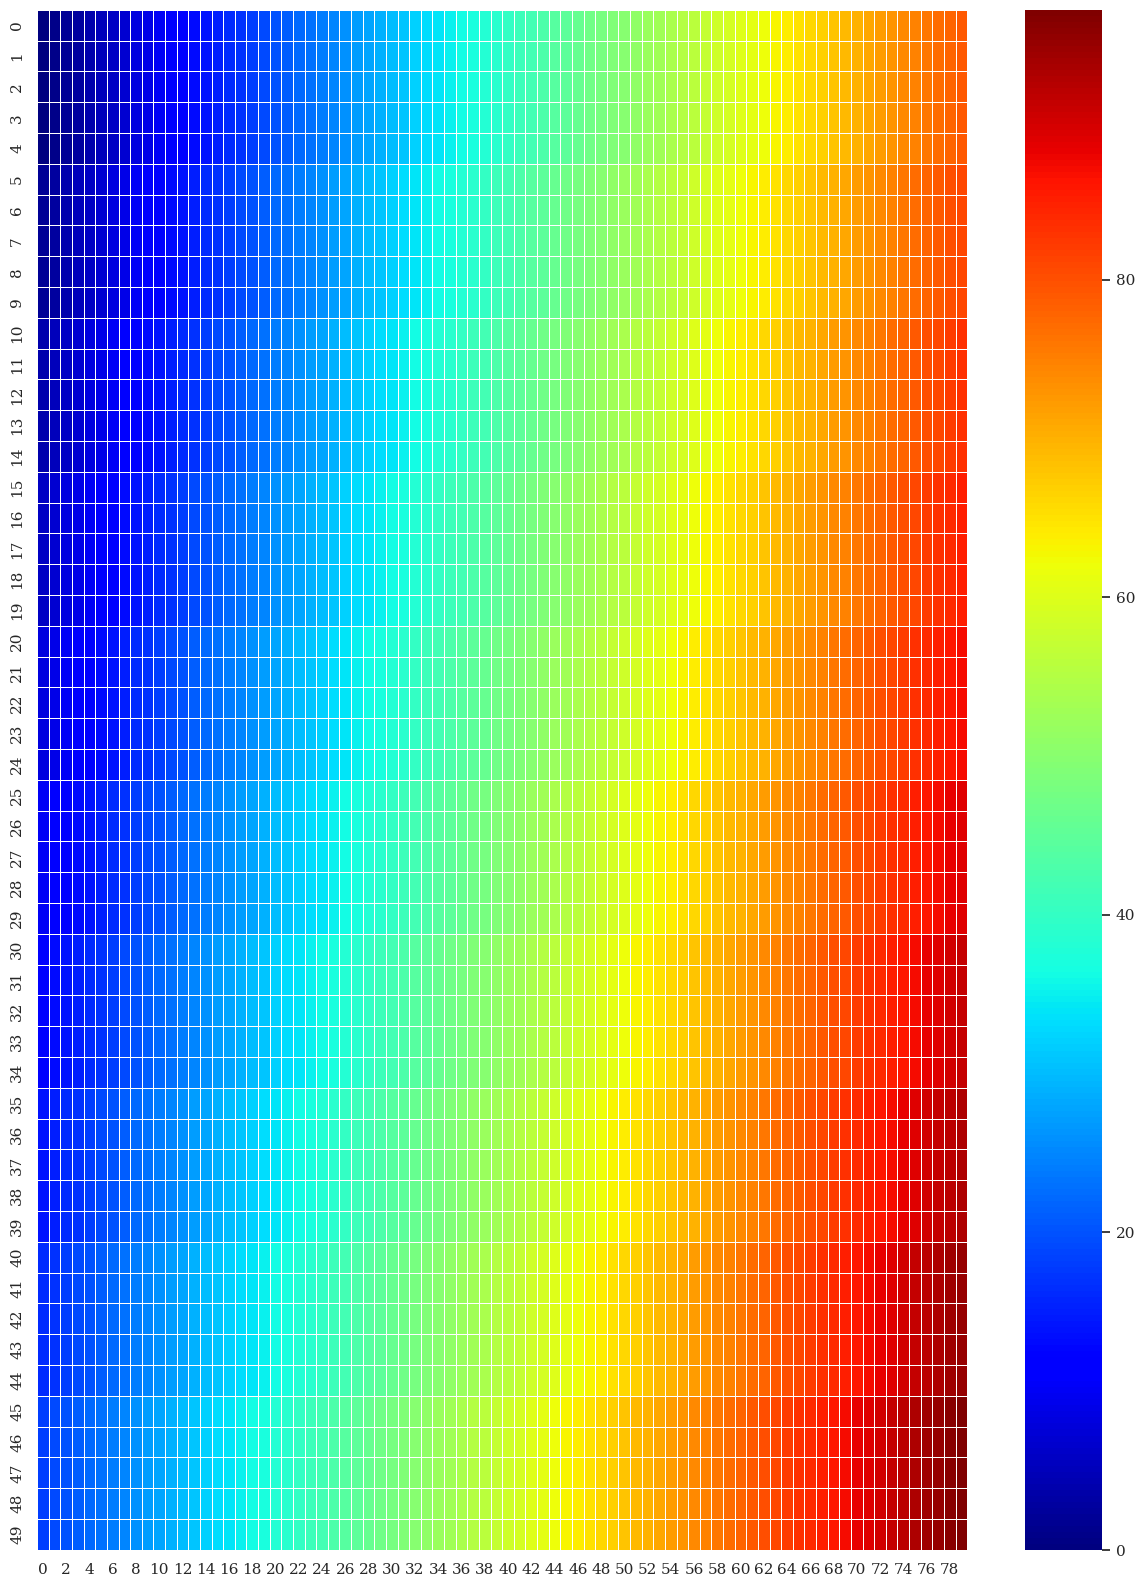

In [68]:
fig, ax = plt.subplots(figsize=(15, 2*order))
sns.heatmap(augmented_signal[0], ax=ax,linewidth=.5, cmap='jet')
plt.show()